# House Prices - Advanced Regression Techniques
### by Gonzalo Gómez Millán del Villar

<img src="https://m.foolcdn.com/media/affiliates/images/house_and_money_in_stacks.width-1200.jpg" width = 600>

https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques

## 1. Read libraries and the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib import rcParams
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from scipy.stats import probplot, boxcox
from scipy.special import inv_boxcox
import pylab

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import Ridge, Lasso, BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline

In [2]:
def display_results(y_test, y_pred):
    labels = np.unique(y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred, labels=labels)
    accuracy = (y_pred == y_test).mean()
    print("Labels:", labels)
    print("Confusion Matrix:\n", confusion_mat)
    print("Accuracy:", accuracy)

In [3]:
df_train = pd.read_csv('train.csv')

In [4]:
def fill_NA (df, idx, typ):
    '''
    This is a function used to fill the NaN values with the string "NA"
    INPUT:
        df - DataFrame: DataFrame to be cleaned
        idx - string: Variable with NaN values
    
    OUTPUT:
        None
    '''
    if typ == 'train':
        df_train_clean[idx].fillna('NA', inplace = True)
        print('The number of missing values of {} is {} after the cleaning operation.'.format(idx,df_train_clean[idx].isna().sum()))
        print('In this case, the NaN values have been replaced by the string "NA", as shown in the variable description.')
    
    if typ == 'test':
        df_test_clean[idx].fillna('NA', inplace = True)
        print('The number of missing values of {} is {} after the cleaning operation.'.format(idx,df_train_clean[idx].isna().sum()))
        print('In this case, the NaN values have been replaced by the string "NA", as shown in the variable description.')
        
    return

## 2. Exploratory analysis

First of all, we're taking a look at the data and the structure of the train set:

In [5]:
df_train.shape

(1460, 81)

In [6]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
df_train.duplicated().sum()

0

<div class="alert alert-block alert-info">
<b>MISSING VALUES</b> </div>

In [10]:
df_train_na = df_train.isna().sum()
df_train_na = df_train_na[df_train_na != 0]
df_train_na

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [11]:
print('There are {} variables with NaN values in the train set, so it is necessary to carry out some cleaning operations.'.format(len(df_train_na)))

There are 19 variables with NaN values in the train set, so it is necessary to carry out some cleaning operations.


<div class="alert alert-block alert-info">
<b>CLEANING MISSING VALUES</b> </div>


- [x] LotFrontage      
- [x] Alley           
- [x] MasVnrType         
- [x] MasVnrArea         
- [x] BsmtQual          
- [x] BsmtCond          
- [x] BsmtExposure      
- [x] BsmtFinType1      
- [x] BsmtFinType2      
- [x] Electrical         
- [x] FireplaceQu      
- [x] GarageType        
- [x] GarageYrBlt       
- [x] GarageFinish      
- [x] GarageQual        
- [x] GarageCond        
- [x] PoolQC          
- [x] Fence           
- [x] MiscFeature     

In [12]:
df_train_clean = df_train.copy()

It is interesting to see in a headmap the correlation between the different parameters, so we can analyze analyze the impact of the cleaning process in the variables and its relation with SalePrice.

In [13]:
corr_train = df_train.corr()

Nevertheless, we should focus on the correlation of the different parameters with SalePrice. Now I am sorting the correlation paramenters in descendingo order, so it is possible to realize which are the parameters with a higher correlation parameter:

In [14]:
corr_train.SalePrice.sort_values(ascending = False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

C:\Users\gonza\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


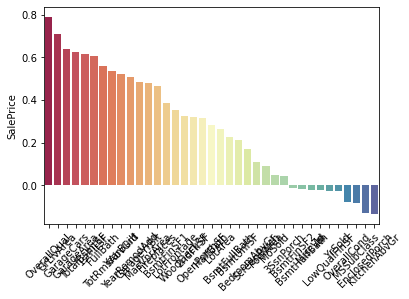

In [15]:
y = corr_train.SalePrice.sort_values(ascending = False)[1:]
x = y.index
sb.barplot(x,y, palette = 'Spectral')
plt.xticks(rotation = 45)
rcParams['figure.figsize'] = 20,5;

In [16]:
corr_train_index = set(corr_train[(corr_train.SalePrice>0.2) | (corr_train.SalePrice<-0.2)]['SalePrice'].sort_values(ascending = False).index)
train_na_index = set(df_train_na[df_train_na != 0].index)
np.intersect1d(corr_train_index, train_na_index)

array([], dtype=object)

>After the comparison of the two sets where we have stored the parameters which have the highest (<-0.2 & >0.2) correlation coefficient and the parameters with NaN values, we can come to the conclusion that it is not necessary to clean the 81 parameters with a high amount of NaN values

- **LotFrontage**: Linear feet of street connected to property

In [17]:
df_train['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [18]:
print('There are {}% of missing values.'.format((df_train_na['LotFrontage']/df_train.shape[0])*100))

There are 17.73972602739726% of missing values.


In [19]:
print('The correlation coefficient before filling the missing values is {}.'.format(corr_train.SalePrice.LotFrontage))

The correlation coefficient before filling the missing values is 0.35179909657067737.


In [20]:
df_train_clean['LotFrontage'].fillna(df_train['LotFrontage'].mean(), inplace = True)

In [21]:
df_train_clean['LotFrontage'].isna().sum()

0

In [22]:
print('The correlation coefficient before filling the missing values is {}.'.format(df_train_clean.corr()['SalePrice']['LotFrontage']))

The correlation coefficient before filling the missing values is 0.3349008515405512.


> The NaN values has been filled with the mean without a relevant impact on the correlation coefficient on the SalePrice.

---

- **Alley**: Type of alley access

**Grvl**: Gravel
**Pave**: Paved
**NA**: No alley access

In [23]:
fill_NA(df_train, 'Alley', 'train')

The number of missing values of Alley is 0 after the cleaning operation.
In this case, the NaN values have been replaced by the string "NA", as shown in the variable description.


> In this case, is much more clear that the NaN values has to be filled with a string which describes that there is no access to the alley.

---

- **MasVnrType**: Masonry veneer type

     **BrkCmn**: Brick Common
     **BrkFace**: Brick Face
     **CBlock**: Cinder Block
     **None**: None
     **Stone**: Stone

In [24]:
df_train['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [25]:
df_train_clean['MasVnrType'].fillna('None', inplace = True)

In [26]:
df_train[df_train_clean['MasVnrType'].isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


> In the case of this variable, since there are only 8 missing values, I am going to consider the premise of that the missing values are "None".

---

- **MasVnrArea**: Masonry veneer area in square feet

So we can be consequent with the criteria used in the prior variable, let's check if the NaN values of the values of MasVnrType and MasVnrArea are in the same lines:

In [27]:
df_train[(df_train['MasVnrType'].isna()) | (df_train['MasVnrArea'].isna())][['MasVnrType','MasVnrArea']]

,MasVnrType,MasVnrArea
234,NaN,NaN
529,NaN,NaN
650,NaN,NaN
936,NaN,NaN
973,NaN,NaN
977,NaN,NaN
1243,NaN,NaN
1278,NaN,NaN


> Considering the results, it makes sense to fill the NaN values with "0", since the NaN values in the variable MasVnrType has been filled with "None".

In [28]:
df_train_clean['MasVnrArea'].fillna(0, inplace = True)

In [29]:
df_train[df_train_clean['MasVnrArea'].isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


---

- **BsmtQual**: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement

In [30]:
df_train['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [31]:
df_train_clean['BsmtQual'].fillna('TA', inplace = True)

> In this case, considering the low amount of NaN values and that "TA" is the one that appeared with highest frequency, the NaN values are filled with "TA".

---

- **BsmtCond**: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement

In [32]:
fill_NA(df_train, 'BsmtCond', 'train')

The number of missing values of BsmtCond is 0 after the cleaning operation.
In this case, the NaN values have been replaced by the string "NA", as shown in the variable description.


> In this case, it was only necessary to replace the NaN values by "NA", so they are not missing values anymore and can be considered for the analysis.

---

- **BsmtExposure**: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement


In [33]:
fill_NA(df_train, 'BsmtExposure', 'train')

The number of missing values of BsmtExposure is 0 after the cleaning operation.
In this case, the NaN values have been replaced by the string "NA", as shown in the variable description.


> In this case, it was only necessary to replace the NaN values by "NA", so they are not missing values anymore and can be considered for the analysis.

---

- **BsmtFinType1**: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

In [34]:
fill_NA(df_train, 'BsmtFinType1', 'train')

The number of missing values of BsmtFinType1 is 0 after the cleaning operation.
In this case, the NaN values have been replaced by the string "NA", as shown in the variable description.


> In this case, it was only necessary to replace the NaN values by "NA", so they are not missing values anymore and can be considered for the analysis.

---

- **BsmtFinType2**: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

In [35]:
fill_NA(df_train, 'BsmtFinType2', 'train')

The number of missing values of BsmtFinType2 is 0 after the cleaning operation.
In this case, the NaN values have been replaced by the string "NA", as shown in the variable description.


> In this case, it was only necessary to replace the NaN values by "NA", so they are not missing values anymore and can be considered for the analysis.

---

- **Electrical**: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed


In [36]:
df_train['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [37]:
df_train_clean['Electrical'].fillna('SBrkr', inplace = True)

In [38]:
df_train_clean[df_train_clean['Electrical'].isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


---

- **FireplaceQu**: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace


In [39]:
fill_NA(df_train, 'FireplaceQu', 'train')

The number of missing values of FireplaceQu is 0 after the cleaning operation.
In this case, the NaN values have been replaced by the string "NA", as shown in the variable description.


---

- **GarageType**: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage

In [40]:
fill_NA(df_train, 'GarageType', 'train')

The number of missing values of GarageType is 0 after the cleaning operation.
In this case, the NaN values have been replaced by the string "NA", as shown in the variable description.


---

- **GarageYrBlt**: Year garage was built

In [41]:
fill_NA(df_train, 'GarageYrBlt', 'train')

The number of missing values of GarageYrBlt is 0 after the cleaning operation.
In this case, the NaN values have been replaced by the string "NA", as shown in the variable description.


---

- **GarageFinish**: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage

In [42]:
fill_NA(df_train, 'GarageFinish', 'train')

The number of missing values of GarageFinish is 0 after the cleaning operation.
In this case, the NaN values have been replaced by the string "NA", as shown in the variable description.


---

- **GarageQual**: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

In [43]:
fill_NA(df_train, 'GarageQual', 'train')

The number of missing values of GarageQual is 0 after the cleaning operation.
In this case, the NaN values have been replaced by the string "NA", as shown in the variable description.


---

- **GarageCond**: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

In [44]:
fill_NA(df_train, 'GarageCond', 'train')

The number of missing values of GarageCond is 0 after the cleaning operation.
In this case, the NaN values have been replaced by the string "NA", as shown in the variable description.


---

- **PoolQC**: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool

In [45]:
fill_NA(df_train, 'PoolQC', 'train')

The number of missing values of PoolQC is 0 after the cleaning operation.
In this case, the NaN values have been replaced by the string "NA", as shown in the variable description.


---

- **Fence**: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence

In [46]:
fill_NA(df_train, 'Fence', 'train')

The number of missing values of Fence is 0 after the cleaning operation.
In this case, the NaN values have been replaced by the string "NA", as shown in the variable description.


---

- **MiscFeature**: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None

In [47]:
fill_NA(df_train, 'MiscFeature', 'train')

The number of missing values of MiscFeature is 0 after the cleaning operation.
In this case, the NaN values have been replaced by the string "NA", as shown in the variable description.


---
---

<div class="alert alert-block alert-info">
<b>DATA TYPES MODIFICATION</b> </div>

- **Object to categorical data**
Since all the columns with object data (and even one with integer data) classifies the data in categories, the object data should be turn into categorical data to facilitate the subsequent analysis.

In [48]:
df_train_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [49]:
category = df_train_clean.select_dtypes(object).columns

In [50]:
df_train_clean.select_dtypes(object)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,2003.0,RFn,TA,TA,Y,NA,NA,NA,WD,Normal
1,RL,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,1976.0,RFn,TA,TA,Y,NA,NA,NA,WD,Normal
2,RL,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,2001.0,RFn,TA,TA,Y,NA,NA,NA,WD,Normal
3,RL,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,1998.0,Unf,TA,TA,Y,NA,NA,NA,WD,Abnorml
4,RL,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,2000.0,RFn,TA,TA,Y,NA,NA,NA,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,1999.0,RFn,TA,TA,Y,NA,NA,NA,WD,Normal
1456,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,1978.0,Unf,TA,TA,Y,NA,MnPrv,NA,WD,Normal
1457,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,1941.0,RFn,TA,TA,Y,NA,GdPrv,Shed,WD,Normal
1458,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,1950.0,Unf,TA,TA,Y,NA,NA,NA,WD,Normal


In [51]:
df_train_clean[category] = df_train_clean[category].apply(lambda x: x.astype('category'))

In [52]:
df_train_clean[['MSSubClass', 'OverallQual', 'OverallCond']] = df_train_clean[['MSSubClass', 'OverallQual', 'OverallCond']].astype('category')

In [53]:
df_train_clean.shape

(1460, 81)

<div class="alert alert-block alert-info">
<b>DUMMY VARIABLES</b> </div>

In [54]:
cat = df_train_clean.select_dtypes('category').columns

In [55]:
df_train_dummies = pd.get_dummies(df_train_clean[cat])
df_train_dummies.shape

(1460, 397)

In [56]:
df_train_clean = pd.concat([df_train_clean, df_train_dummies],axis = 1)
df_train_clean.drop(cat, axis = 1, inplace = True)

In [57]:
df_train_clean.head()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,65.0,8450,2003,2003,196.0,706,0,150,856,...,0,0,0,1,0,0,0,0,1,0
1,2,80.0,9600,1976,1976,0.0,978,0,284,1262,...,0,0,0,1,0,0,0,0,1,0
2,3,68.0,11250,2001,2002,162.0,486,0,434,920,...,0,0,0,1,0,0,0,0,1,0
3,4,60.0,9550,1915,1970,0.0,216,0,540,756,...,0,0,0,1,1,0,0,0,0,0
4,5,84.0,14260,2000,2000,350.0,655,0,490,1145,...,0,0,0,1,0,0,0,0,1,0


In [58]:
df_train_clean.corr()['SalePrice'].sort_values(ascending = False)

SalePrice           1.000000
GrLivArea           0.708624
GarageCars          0.640409
GarageArea          0.623431
TotalBsmtSF         0.613581
                      ...   
GarageFinish_Unf   -0.410608
FireplaceQu_NA     -0.471908
BsmtQual_TA        -0.498545
KitchenQual_TA     -0.519298
ExterQual_TA       -0.589044
Name: SalePrice, Length: 431, dtype: float64

In [59]:
df_train_clean.shape

(1460, 431)

<div class="alert alert-block alert-info">
<b>ENCODING</b> </div>

Now it is time to find the best possible model and to train it to get the best possible solution:

In [60]:
df_train_clean.SalePrice

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [61]:
df_train_clean.dropna(inplace = True)
X = df_train_clean.drop('SalePrice', axis = 1)
y = df_train_clean.SalePrice

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
standsc = StandardScaler()
y_train = np.asarray(y_train).reshape(-1,1)
X_train = standsc.fit_transform(X_train)
y_train = standsc.fit_transform(y_train)

Now we are going to train different models, so we can compare between them which is the one with the best performance:

In [63]:
models = {
    'ridge' : Ridge(),
    'gradient boosting' : GradientBoostingRegressor(),
    'lasso' : Lasso(),
    'random forest' : RandomForestRegressor(),
    'bayesian ridge' : BayesianRidge(),
    'support vector': SVR(),
    'knn' : KNeighborsRegressor(n_neighbors = 4),
    }

In [64]:
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f'{name} trained')

ridge trained


C:\Users\gonza\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


gradient boosting trained
lasso trained


C:\Users\gonza\AppData\Local\Temp/ipykernel_8796/2815109636.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


random forest trained
bayesian ridge trained


C:\Users\gonza\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gonza\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


support vector trained
knn trained


In [65]:
results = {}
kf = KFold(n_splits= 10)

for name, model in models.items():
    result = np.mean(np.sqrt(-cross_val_score(model, X_train, y_train, scoring = 'neg_mean_squared_error', cv= kf)))
    results[name] = result

C:\Users\gonza\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gonza\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gonza\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gonza\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

C:\Users\gonza\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gonza\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gonza\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gonza\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

After having trained the different models, now it is time to see the results of the negative mean square error:

In [66]:
for name, result in results.items():
    print(f"{name} : {round(result, 3)}")

ridge : 0.47
gradient boosting : 0.378
lasso : 0.994
random forest : 0.398
bayesian ridge : 0.433
support vector : 0.49
knn : 0.579


> We can observed that the model with the better performance is lasso regression model. 

In [67]:
lasso = Lasso()

In [68]:
lasso.fit(X_train, y_train)

Lasso()

In [69]:
y_pred = lasso.predict(X_test)

C:\Users\gonza\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


Let's try to improve the performance of the model based by eliminating the factors with lower correlation rate.

In [70]:
df_train_clean.corr()['SalePrice'].sort_values(ascending = False)

SalePrice           1.000000
GrLivArea           0.708624
GarageCars          0.640409
GarageArea          0.623431
TotalBsmtSF         0.613581
                      ...   
GarageFinish_Unf   -0.410608
FireplaceQu_NA     -0.471908
BsmtQual_TA        -0.498545
KitchenQual_TA     -0.519298
ExterQual_TA       -0.589044
Name: SalePrice, Length: 431, dtype: float64

In [71]:
high_corr = pd.DataFrame(df_train_clean.corr()['SalePrice'].sort_values(ascending = False)).rename(columns= {'SalePrice' : 'Correlation'})

In [72]:
ind = high_corr[(high_corr['Correlation'] > 0.5) | (high_corr['Correlation'] < -0.5)].index.to_list()

In [73]:
X_2 = df_train_clean[ind].drop('SalePrice', axis = 1)
y_2 = df_train_clean[ind].SalePrice

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size = 0.2, random_state = 42)
standsc = StandardScaler()
y_train = np.asarray(y_train).reshape(-1,1)
X_train = standsc.fit_transform(X_train)
y_train = standsc.fit_transform(y_train)

By implementing the same steps as before: 

In [75]:
models = {
    'ridge' : Ridge(),
    'gradient boosting' : GradientBoostingRegressor(),
    'lasso' : Lasso(),
    'random forest' : RandomForestRegressor(),
    'bayesian ridge' : BayesianRidge(),
    'support vector': SVR(),
    'knn' : KNeighborsRegressor(n_neighbors = 4),
    }

In [76]:
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f'{name} trained')

ridge trained
gradient boosting trained


C:\Users\gonza\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


lasso trained


C:\Users\gonza\AppData\Local\Temp/ipykernel_8796/2815109636.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


random forest trained
bayesian ridge trained
support vector trained
knn trained


C:\Users\gonza\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gonza\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [77]:
results_2 = {}
kf = KFold(n_splits= 10)

for name, model in models.items():
    result = np.mean(np.sqrt(-cross_val_score(model, X_train, y_train, scoring = 'neg_mean_squared_error', cv= kf)))
    results_2[name] = result

C:\Users\gonza\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gonza\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gonza\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gonza\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

C:\Users\gonza\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gonza\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gonza\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gonza\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

The results of this new scenario are:

In [78]:
for name, result in results_2.items():
    print(f"{name} : {round(result, 3)}")

ridge : 0.477
gradient boosting : 0.443
lasso : 0.994
random forest : 0.432
bayesian ridge : 0.477
support vector : 0.437
knn : 0.485


And comparing them with the values achieved earlier...

In [79]:
for name, result in results.items():
    print(f"{name} : {round(result, 3)}")

ridge : 0.47
gradient boosting : 0.378
lasso : 0.994
random forest : 0.398
bayesian ridge : 0.433
support vector : 0.49
knn : 0.579


In [80]:
results_df = pd.DataFrame(results, index = range(0,1)).T.rename(columns = {0: 'RMSE complete'}).sort_values('RMSE complete', ascending = False)
results_df.T

,lasso,knn,support vector,ridge,bayesian ridge,random forest,gradient boosting
RMSE complete,0.994314,0.578787,0.490314,0.469674,0.43309,0.397671,0.378078


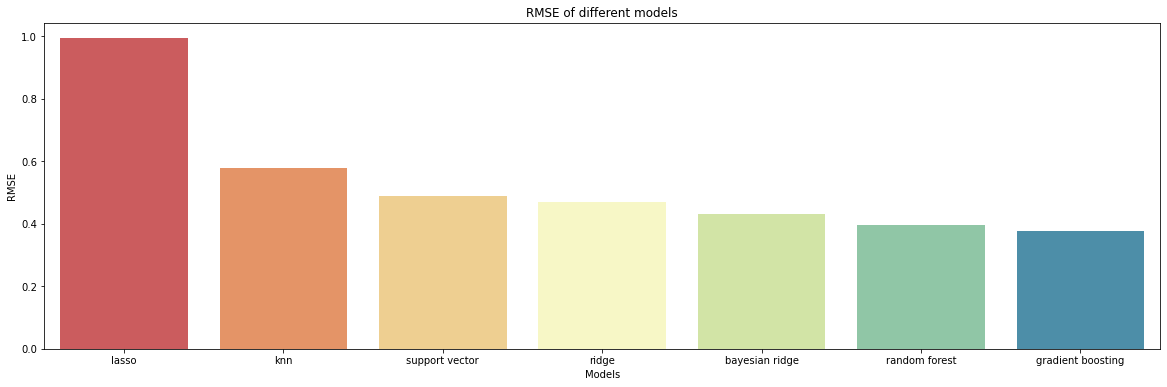

In [81]:
plt.figure(figsize = (20, 6))
sb.barplot(x = results_df.index, y = results_df['RMSE complete'], palette = 'Spectral')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('RMSE of different models');

In [82]:
results_df_simplified = pd.DataFrame(results_2, index = range(0,1)).T.rename(columns = {0: 'RMSE simplified'}).sort_values('RMSE simplified', ascending = False)
results_df_simplified.T

,lasso,knn,ridge,bayesian ridge,gradient boosting,support vector,random forest
RMSE simplified,0.994314,0.484855,0.477369,0.477328,0.442525,0.436555,0.43193


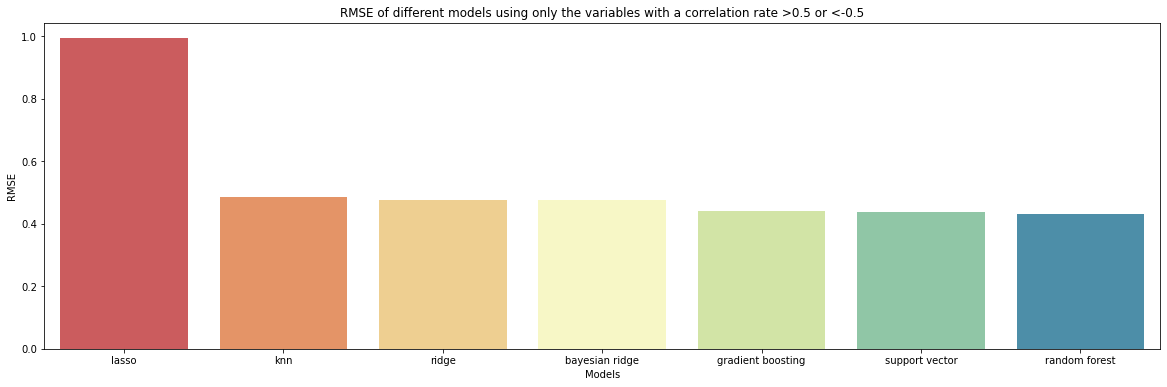

In [83]:
plt.figure(figsize = (20, 6))
sb.barplot(x = results_df_simplified.index, y = results_df_simplified['RMSE simplified'], palette = 'Spectral')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('RMSE of different models using only the variables with a correlation rate >0.5 or <-0.5');

In [84]:
df_comparison = results_df.T.append(results_df_simplified.T, ignore_index = False)
df_comparison

,lasso,knn,support vector,ridge,bayesian ridge,random forest,gradient boosting
RMSE complete,0.994314,0.578787,0.490314,0.469674,0.433090,0.397671,0.378078
RMSE simplified,0.994314,0.484855,0.436555,0.477369,0.477328,0.431930,0.442525


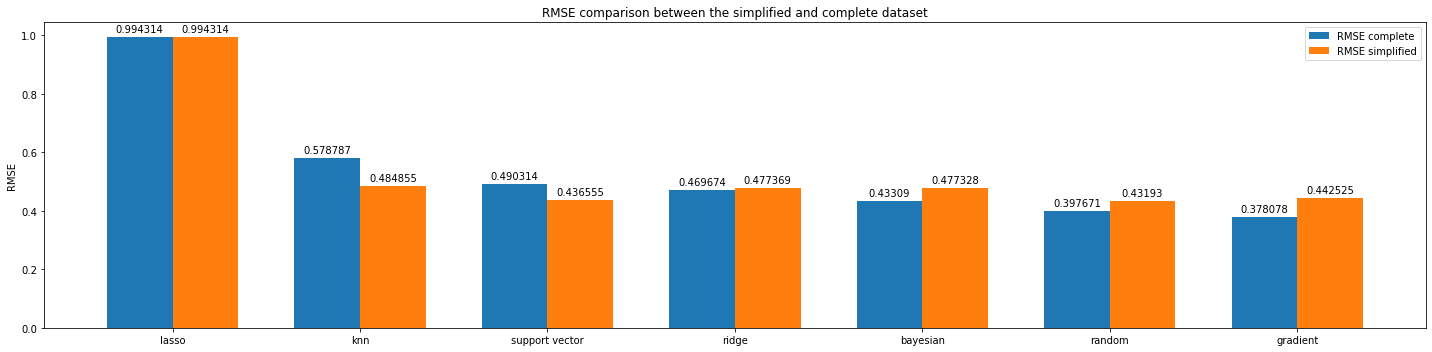

In [85]:
labels = ['lasso', 'knn', 'support vector', 'ridge', 'bayesian','random','gradient']
RMSE_complete = df_comparison.loc['RMSE complete'].values
RMSE_simplified = df_comparison.loc['RMSE simplified'].values

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, RMSE_complete, width, label = 'RMSE complete')
rects2 = ax.bar(x + width/2, RMSE_simplified, width, label = 'RMSE simplified')

ax.set_ylabel('RMSE')
ax.set_title('RMSE comparison between the simplified and complete dataset')
plt.xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding = 3)
ax.bar_label(rects2, padding = 3)

fig.tight_layout()

plt.show()

> As we can observed, both in the complete dataset and in the one with the variables with higher correlation rates the Lasso regression model is the one with clearly the higher performance rate. Additionally, it can be realized that the elimination of the variables with the lower correlation rate had not a relevant impact on the results.

> Nevertheless, the elimination of the variables with the worse correlation rate had a relevant impact, although it is different depending on the model. In the KNeighborsRegressor and the Support Vector models the performance has worsened after eliminating the variables with the lower correlation rate. In the case of the Ridge, Bayesian Ridge, RandomForestRegressor and Gradient Boosting the RMSE has been slightly improved.